## Appendix-1: Exploratory Data Analysis: CIFAR-10 dataset

Exploratory data analysis (EDA) is an important step in understanding any dataset, including the CIFAR-10 dataset. CIFAR-10 is a popular computer vision dataset containing 60,000 32x32 color images in 10 classes, with 6,000 images per class.

Following are some steps for performing EDA on the CIFAR-10 dataset:

In [1]:
# import library dependencies
import numpy as np
import matplotlib.pyplot as plt

### 1. Load the dataset: 

The first step is to load the CIFAR-10 dataset into the programming environment.

In [2]:
ROOT_PATH='../'

In [3]:
# function to open pickle file
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
# store each pickle files in individual batches
batch1 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_1")
batch2 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_2")
batch3 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_3")
batch4 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_4")
batch5 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_5")
test_batch = unpickle(ROOT_PATH+"cifar-10-batches-py/test_batch")

In [5]:
# function to create labels and images from data
def load_data0(btch):
    labels = btch[b'labels']
    imgs = btch[b'data'].reshape((-1, 32, 32, 3))
    
    res = []
    for ii in range(imgs.shape[0]):
        img = imgs[ii].copy()
        img = np.fliplr(np.rot90(np.transpose(img.flatten().reshape(3,32,32)), k=-1))
        res.append(img)
    imgs = np.stack(res)
    return labels, imgs

In [6]:
# function to load data into training and test set
def load_data():
    x_train_l = []
    y_train_l = []
    for ibatch in [batch1, batch2, batch3, batch4, batch5]:
        labels, imgs = load_data0(ibatch)
        x_train_l.append(imgs)
        y_train_l.extend(labels)
    x_train = np.vstack(x_train_l)
    y_train = np.vstack(y_train_l)
    
    x_test_l = []
    y_test_l = []
    labels, imgs = load_data0(test_batch)
    x_test_l.append(imgs)
    y_test_l.extend(labels)
    x_test = np.vstack(x_test_l)
    y_test = np.vstack(y_test_l)
    return (x_train, y_train), (x_test, y_test)

In [7]:
# create training and test set
(x_train, y_train), (x_test, y_test) = load_data()

In [8]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [9]:
print(x_train.shape[0], 'train samples (x)')
print(y_train.shape[0], 'train samples (y)')

50000 train samples (x)
50000 train samples (y)


In [10]:
print(x_test.shape[0], 'test samples (x)')
print(y_test.shape[0], 'test samples (y)')

10000 test samples (x)
10000 test samples (y)


### 2. Visualize some samples: 

After loading the dataset, it's always a good idea to visualize some samples to get a better understanding of the data. Let's use the matplotlib library for this purpose.

In [11]:
# Define class names
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

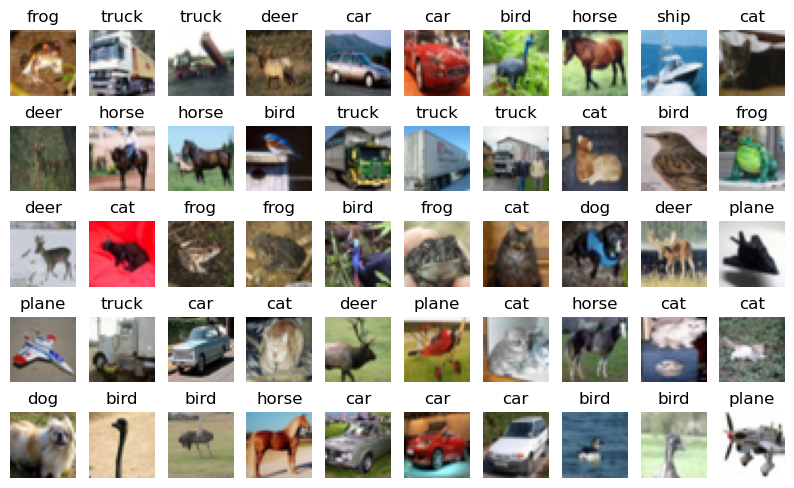

In [12]:
%matplotlib inline

# Visualize the first 10 images in the training set
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(classes[y_train[i][0]])
    ax.axis('off')
plt.show()

### 3. Check the class distribution: 

It's important to check whether the dataset is balanced or not, i.e., whether there are an equal number of images for each class. Let's use the numpy library for this purpose.

In [13]:
# Count the number of images in each class
unique, counts = np.unique(y_train, return_counts=True)
unique1, counts1 = np.unique(y_test, return_counts=True)

# Print the number of images in each class
print("Class distribution for training set:")
for i in range(len(unique)):
    print(classes[unique[i]], ":", counts[i])
print("\n")
print("Class distribution for test set:")
for i in range(len(unique1)):
    print(classes[unique1[i]], ":", counts1[i])

Class distribution for training set:
plane : 5000
car : 5000
bird : 5000
cat : 5000
deer : 5000
dog : 5000
frog : 5000
horse : 5000
ship : 5000
truck : 5000


Class distribution for test set:
plane : 1000
car : 1000
bird : 1000
cat : 1000
deer : 1000
dog : 1000
frog : 1000
horse : 1000
ship : 1000
truck : 1000


### 4. Calculate basic statistics: 

Let's also calculate basic statistics such as mean, standard deviation, minimum, and maximum pixel values to get an idea of the pixel distribution in the dataset.

In [14]:
print("Mean pixel value: ", np.mean(x_train))
print("Standard deviation of pixel values: ", np.std(x_train))
print("Minimum pixel value: ", np.min(x_train))
print("Maximum pixel value: ", np.max(x_train))

Mean pixel value:  120.70756512369792
Standard deviation of pixel values:  64.1500758911213
Minimum pixel value:  0
Maximum pixel value:  255
